In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import monai
import tifffile as tiff
from monai.transforms import LoadImage
from tifffile import imread
from monai.data import WSIReader
from collections import defaultdict

In [2]:
def transform_coordinate_into_mask(coordinates):
    """
    transform coordinate into mask image
    
    parameters
    ----------
    coordinates: list
        coordinate of mask
    
    returns
    ----------
    mask: numpy.array
        image of mask
    """
    mask = np.zeros(shape=(512, 512))
    
    for coordinate in coordinates:
        for axis in coordinate[0]:
            mask[axis[1], axis[0]] = 1
    
    return mask

In [3]:
tiff_dir = "../data/train/*"
polygon_path = "../data/polygons.jsonl"
tiff_file_paths = glob.glob(tiff_dir)
polygons = pd.read_json(polygon_path, orient='records', lines=True)

In [4]:
print(len(tiff_file_paths))

7033


In [5]:
polygons

,id,annotations
0,0006ff2aa7cd,"[{'type': 'glomerulus', 'coordinates': [[[167,..."
1,00168d1b7522,"[{'type': 'glomerulus', 'coordinates': [[[511,..."
2,0033bbc76b6b,"[{'type': 'blood_vessel', 'coordinates': [[[16..."
3,003504460b3a,"[{'type': 'blood_vessel', 'coordinates': [[[40..."
4,004daf1cbe75,"[{'type': 'blood_vessel', 'coordinates': [[[14..."
...,...,...
1628,ff434af74304,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1629,ff4897b3eda6,"[{'type': 'blood_vessel', 'coordinates': [[[29..."
1630,ff66dec71c4c,"[{'type': 'blood_vessel', 'coordinates': [[[11..."
1631,ff99cdef0f2a,"[{'type': 'blood_vessel', 'coordinates': [[[24..."


In [6]:
# TIFFファイルのパスを指定します。
file_path = tiff_file_paths[0]
tiff_id = tiff_file_paths[0].split("/")[-1].replace(".tif","")
print(file_path)

../data/train/0006ff2aa7cd.tif


In [7]:
# chack the polygon which has vessel annotation
coordinates_list = defaultdict(list)
num_vessel = 0
for i in range(len(polygons)):
    annotations = polygons.loc[i].annotations
    id_ = polygons.loc[i].id
    for annotation in annotations:
        if annotation['type'] == 'blood_vessel':
            coordinates_list[id_].append(annotation['coordinates'])
            num_vessel += 1
print(f'Total number of vessel labels: {num_vessel}')
print(f'The number of images which have vessel labels: {len(coordinates_list.keys())}')

Total number of vessel labels: 16054
The number of images which have vessel labels: 1622


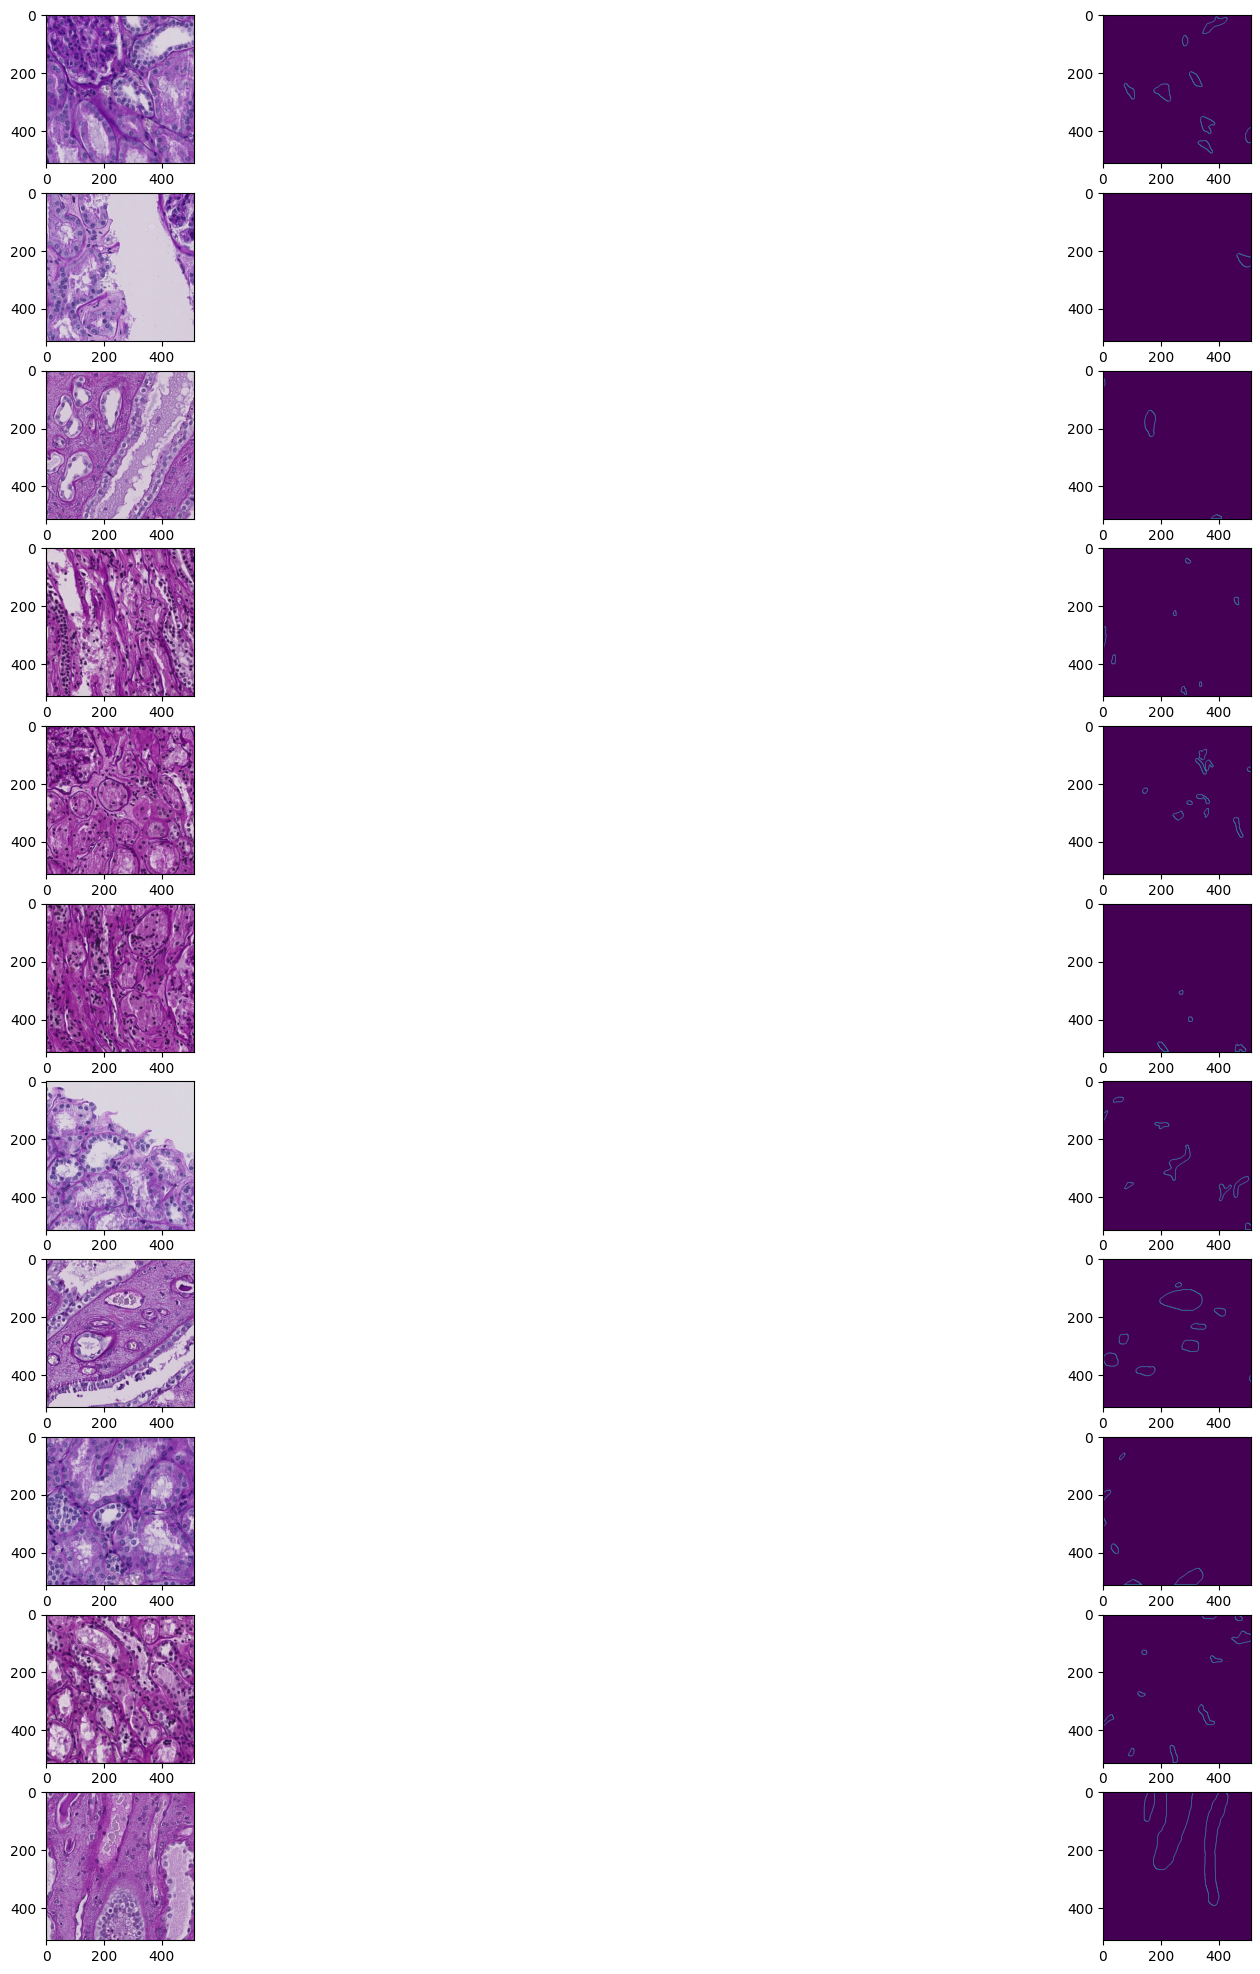

In [20]:
fig, ax = plt.subplots(11, 2,figsize=(25,25))
for i, items in enumerate(coordinates_list.items()):
    image = tiff.imread(f'../data/train/{items[0]}.tif')
    mask = transform_coordinate_into_mask(items[1])
    
    ax[i][0].imshow(image)
    ax[i][1].imshow(mask)
    if i == 10:
        break
plt.savefig("display_training_tiff")